## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9677148	total: 58.6ms	remaining: 58.5s
1:	learn: 0.9492695	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9312965	total: 60.8ms	remaining: 20.2s
3:	learn: 0.9141148	total: 61.7ms	remaining: 15.4s
4:	learn: 0.8977016	total: 62.7ms	remaining: 12.5s
5:	learn: 0.8814256	total: 63.7ms	remaining: 10.5s
6:	learn: 0.8673595	total: 64.5ms	remaining: 9.15s
7:	learn: 0.8506940	total: 65.5ms	remaining: 8.12s
8:	learn: 0.8356550	total: 66.4ms	remaining: 7.31s
9:	learn: 0.8194817	total: 67.4ms	remaining: 6.67s
10:	learn: 0.8044168	total: 68.2ms	remaining: 6.13s
11:	learn: 0.7899627	total: 69ms	remaining: 5.68s
12:	learn: 0.7754443	total: 69.8ms	remaining: 5.3s
13:	learn: 0.7621733	total: 70.6ms	remaining: 4.97s
14:	learn: 0.7504673	total: 71.5ms	remaining: 4.69s
15:	learn: 0.7358970	total: 72.4ms	remaining: 4.45s
16:	learn: 0.7247006	total: 73.2ms	remaining: 4.23s
17:	learn: 0.7131861	total: 73.9ms	remaining: 4.03s
18:	learn: 0.7015726	total: 74.7ms	remaining: 3

50:	learn: 0.4535973	total: 103ms	remaining: 1.91s
51:	learn: 0.4489594	total: 104ms	remaining: 1.89s
52:	learn: 0.4438088	total: 105ms	remaining: 1.87s
53:	learn: 0.4404052	total: 105ms	remaining: 1.84s
54:	learn: 0.4360620	total: 106ms	remaining: 1.82s
55:	learn: 0.4320334	total: 107ms	remaining: 1.8s
56:	learn: 0.4280455	total: 108ms	remaining: 1.78s
57:	learn: 0.4240904	total: 109ms	remaining: 1.76s
58:	learn: 0.4205806	total: 109ms	remaining: 1.74s
59:	learn: 0.4167042	total: 110ms	remaining: 1.73s
60:	learn: 0.4120246	total: 111ms	remaining: 1.71s
61:	learn: 0.4086388	total: 112ms	remaining: 1.69s
62:	learn: 0.4061134	total: 113ms	remaining: 1.67s
63:	learn: 0.4025174	total: 114ms	remaining: 1.66s
64:	learn: 0.3995992	total: 114ms	remaining: 1.65s
65:	learn: 0.3958621	total: 115ms	remaining: 1.63s
66:	learn: 0.3923613	total: 116ms	remaining: 1.61s
67:	learn: 0.3884328	total: 117ms	remaining: 1.6s
68:	learn: 0.3859464	total: 118ms	remaining: 1.59s
69:	learn: 0.3835473	total: 119ms

153:	learn: 0.2553245	total: 192ms	remaining: 1.05s
154:	learn: 0.2544326	total: 193ms	remaining: 1.05s
155:	learn: 0.2534538	total: 194ms	remaining: 1.05s
156:	learn: 0.2525204	total: 195ms	remaining: 1.05s
157:	learn: 0.2516320	total: 196ms	remaining: 1.04s
158:	learn: 0.2511310	total: 197ms	remaining: 1.04s
159:	learn: 0.2509495	total: 198ms	remaining: 1.04s
160:	learn: 0.2501802	total: 199ms	remaining: 1.03s
161:	learn: 0.2495391	total: 199ms	remaining: 1.03s
162:	learn: 0.2487521	total: 200ms	remaining: 1.03s
163:	learn: 0.2480653	total: 201ms	remaining: 1.03s
164:	learn: 0.2475428	total: 203ms	remaining: 1.02s
165:	learn: 0.2471701	total: 204ms	remaining: 1.02s
166:	learn: 0.2460837	total: 204ms	remaining: 1.02s
167:	learn: 0.2451846	total: 205ms	remaining: 1.02s
168:	learn: 0.2446205	total: 206ms	remaining: 1.01s
169:	learn: 0.2439825	total: 207ms	remaining: 1.01s
170:	learn: 0.2431722	total: 208ms	remaining: 1.01s
171:	learn: 0.2426923	total: 209ms	remaining: 1s
172:	learn: 0.2

271:	learn: 0.1962909	total: 294ms	remaining: 786ms
272:	learn: 0.1960375	total: 294ms	remaining: 784ms
273:	learn: 0.1959068	total: 295ms	remaining: 782ms
274:	learn: 0.1957103	total: 296ms	remaining: 781ms
275:	learn: 0.1954605	total: 297ms	remaining: 779ms
276:	learn: 0.1953340	total: 298ms	remaining: 777ms
277:	learn: 0.1951130	total: 299ms	remaining: 776ms
278:	learn: 0.1947900	total: 300ms	remaining: 774ms
279:	learn: 0.1945958	total: 301ms	remaining: 773ms
280:	learn: 0.1945086	total: 301ms	remaining: 771ms
281:	learn: 0.1944078	total: 302ms	remaining: 769ms
282:	learn: 0.1937208	total: 303ms	remaining: 768ms
283:	learn: 0.1935294	total: 304ms	remaining: 766ms
284:	learn: 0.1934247	total: 307ms	remaining: 769ms
285:	learn: 0.1933085	total: 307ms	remaining: 767ms
286:	learn: 0.1929346	total: 309ms	remaining: 767ms
287:	learn: 0.1926352	total: 310ms	remaining: 766ms
288:	learn: 0.1924310	total: 310ms	remaining: 764ms
289:	learn: 0.1919733	total: 311ms	remaining: 762ms
290:	learn: 

371:	learn: 0.1656260	total: 383ms	remaining: 647ms
372:	learn: 0.1654740	total: 384ms	remaining: 646ms
373:	learn: 0.1650789	total: 385ms	remaining: 644ms
374:	learn: 0.1648054	total: 386ms	remaining: 643ms
375:	learn: 0.1643531	total: 387ms	remaining: 642ms
376:	learn: 0.1641193	total: 388ms	remaining: 641ms
377:	learn: 0.1637275	total: 389ms	remaining: 639ms
378:	learn: 0.1634262	total: 390ms	remaining: 638ms
379:	learn: 0.1628767	total: 390ms	remaining: 637ms
380:	learn: 0.1624217	total: 391ms	remaining: 636ms
381:	learn: 0.1621392	total: 392ms	remaining: 634ms
382:	learn: 0.1620948	total: 393ms	remaining: 633ms
383:	learn: 0.1616134	total: 394ms	remaining: 631ms
384:	learn: 0.1613104	total: 394ms	remaining: 630ms
385:	learn: 0.1610125	total: 395ms	remaining: 629ms
386:	learn: 0.1609547	total: 396ms	remaining: 627ms
387:	learn: 0.1605957	total: 397ms	remaining: 626ms
388:	learn: 0.1605395	total: 398ms	remaining: 624ms
389:	learn: 0.1602183	total: 398ms	remaining: 623ms
390:	learn: 

486:	learn: 0.1362298	total: 484ms	remaining: 510ms
487:	learn: 0.1360582	total: 485ms	remaining: 509ms
488:	learn: 0.1360025	total: 486ms	remaining: 508ms
489:	learn: 0.1356412	total: 487ms	remaining: 507ms
490:	learn: 0.1353717	total: 488ms	remaining: 506ms
491:	learn: 0.1353281	total: 489ms	remaining: 504ms
492:	learn: 0.1350755	total: 489ms	remaining: 503ms
493:	learn: 0.1348230	total: 491ms	remaining: 503ms
494:	learn: 0.1346227	total: 492ms	remaining: 502ms
495:	learn: 0.1342526	total: 492ms	remaining: 500ms
496:	learn: 0.1341991	total: 493ms	remaining: 499ms
497:	learn: 0.1339186	total: 494ms	remaining: 498ms
498:	learn: 0.1336060	total: 495ms	remaining: 497ms
499:	learn: 0.1335653	total: 496ms	remaining: 496ms
500:	learn: 0.1332665	total: 497ms	remaining: 495ms
501:	learn: 0.1330683	total: 499ms	remaining: 495ms
502:	learn: 0.1329207	total: 500ms	remaining: 494ms
503:	learn: 0.1325527	total: 501ms	remaining: 493ms
504:	learn: 0.1323087	total: 502ms	remaining: 492ms
505:	learn: 

588:	learn: 0.1128506	total: 574ms	remaining: 400ms
589:	learn: 0.1125483	total: 575ms	remaining: 399ms
590:	learn: 0.1123582	total: 576ms	remaining: 398ms
591:	learn: 0.1123280	total: 576ms	remaining: 397ms
592:	learn: 0.1122014	total: 577ms	remaining: 396ms
593:	learn: 0.1118634	total: 578ms	remaining: 395ms
594:	learn: 0.1116953	total: 579ms	remaining: 394ms
595:	learn: 0.1114469	total: 580ms	remaining: 393ms
596:	learn: 0.1111671	total: 581ms	remaining: 392ms
597:	learn: 0.1108672	total: 581ms	remaining: 391ms
598:	learn: 0.1107064	total: 582ms	remaining: 390ms
599:	learn: 0.1104931	total: 583ms	remaining: 389ms
600:	learn: 0.1103462	total: 584ms	remaining: 388ms
601:	learn: 0.1102318	total: 585ms	remaining: 387ms
602:	learn: 0.1100955	total: 585ms	remaining: 385ms
603:	learn: 0.1098471	total: 586ms	remaining: 384ms
604:	learn: 0.1096606	total: 587ms	remaining: 383ms
605:	learn: 0.1094233	total: 588ms	remaining: 382ms
606:	learn: 0.1092379	total: 589ms	remaining: 381ms
607:	learn: 

703:	learn: 0.0929801	total: 675ms	remaining: 284ms
704:	learn: 0.0928653	total: 676ms	remaining: 283ms
705:	learn: 0.0927394	total: 677ms	remaining: 282ms
706:	learn: 0.0926025	total: 678ms	remaining: 281ms
707:	learn: 0.0923412	total: 679ms	remaining: 280ms
708:	learn: 0.0921625	total: 680ms	remaining: 279ms
709:	learn: 0.0920489	total: 680ms	remaining: 278ms
710:	learn: 0.0919330	total: 681ms	remaining: 277ms
711:	learn: 0.0917268	total: 682ms	remaining: 276ms
712:	learn: 0.0915804	total: 683ms	remaining: 275ms
713:	learn: 0.0913419	total: 684ms	remaining: 274ms
714:	learn: 0.0912803	total: 685ms	remaining: 273ms
715:	learn: 0.0910981	total: 685ms	remaining: 272ms
716:	learn: 0.0910002	total: 689ms	remaining: 272ms
717:	learn: 0.0908040	total: 690ms	remaining: 271ms
718:	learn: 0.0907143	total: 691ms	remaining: 270ms
719:	learn: 0.0906380	total: 691ms	remaining: 269ms
720:	learn: 0.0905259	total: 692ms	remaining: 268ms
721:	learn: 0.0904126	total: 693ms	remaining: 267ms
722:	learn: 

800:	learn: 0.0792309	total: 765ms	remaining: 190ms
801:	learn: 0.0791538	total: 766ms	remaining: 189ms
802:	learn: 0.0790763	total: 767ms	remaining: 188ms
803:	learn: 0.0789830	total: 768ms	remaining: 187ms
804:	learn: 0.0789358	total: 769ms	remaining: 186ms
805:	learn: 0.0788437	total: 770ms	remaining: 185ms
806:	learn: 0.0786967	total: 770ms	remaining: 184ms
807:	learn: 0.0786384	total: 771ms	remaining: 183ms
808:	learn: 0.0784750	total: 772ms	remaining: 182ms
809:	learn: 0.0783706	total: 773ms	remaining: 181ms
810:	learn: 0.0782717	total: 774ms	remaining: 180ms
811:	learn: 0.0781890	total: 775ms	remaining: 179ms
812:	learn: 0.0781289	total: 776ms	remaining: 178ms
813:	learn: 0.0779679	total: 777ms	remaining: 177ms
814:	learn: 0.0777626	total: 778ms	remaining: 177ms
815:	learn: 0.0776178	total: 778ms	remaining: 176ms
816:	learn: 0.0775449	total: 779ms	remaining: 175ms
817:	learn: 0.0773942	total: 780ms	remaining: 174ms
818:	learn: 0.0772159	total: 781ms	remaining: 173ms
819:	learn: 

918:	learn: 0.0659292	total: 866ms	remaining: 76.4ms
919:	learn: 0.0658332	total: 867ms	remaining: 75.4ms
920:	learn: 0.0657607	total: 868ms	remaining: 74.5ms
921:	learn: 0.0656948	total: 869ms	remaining: 73.5ms
922:	learn: 0.0655923	total: 870ms	remaining: 72.6ms
923:	learn: 0.0654934	total: 871ms	remaining: 71.6ms
924:	learn: 0.0653878	total: 872ms	remaining: 70.7ms
925:	learn: 0.0652931	total: 873ms	remaining: 69.7ms
926:	learn: 0.0651960	total: 874ms	remaining: 68.8ms
927:	learn: 0.0650632	total: 874ms	remaining: 67.8ms
928:	learn: 0.0648737	total: 875ms	remaining: 66.9ms
929:	learn: 0.0647594	total: 876ms	remaining: 65.9ms
930:	learn: 0.0646425	total: 877ms	remaining: 65ms
931:	learn: 0.0645995	total: 877ms	remaining: 64ms
932:	learn: 0.0645214	total: 878ms	remaining: 63.1ms
933:	learn: 0.0644398	total: 879ms	remaining: 62.1ms
934:	learn: 0.0642980	total: 880ms	remaining: 61.2ms
935:	learn: 0.0642437	total: 881ms	remaining: 60.2ms
936:	learn: 0.0641473	total: 881ms	remaining: 59.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

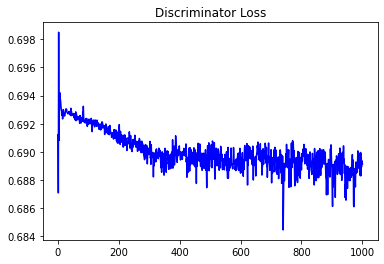

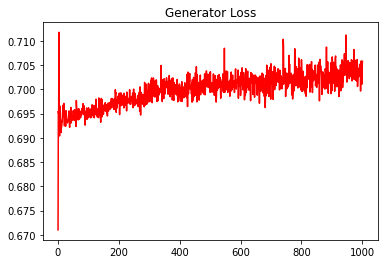

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10792428963075427


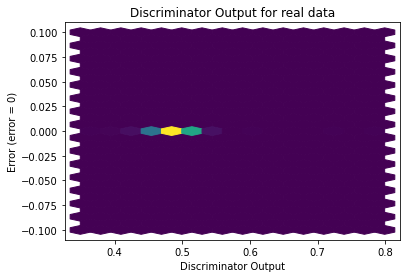

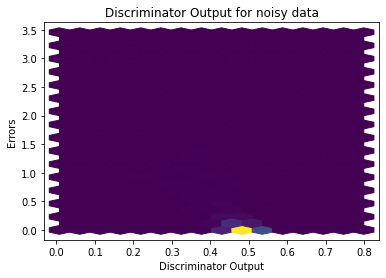

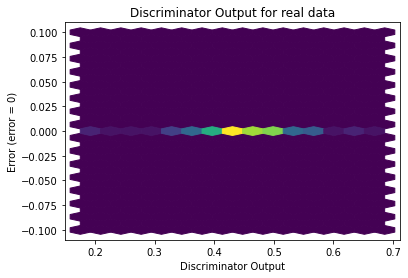

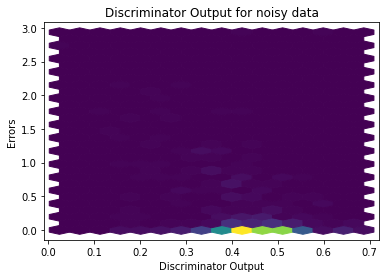

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


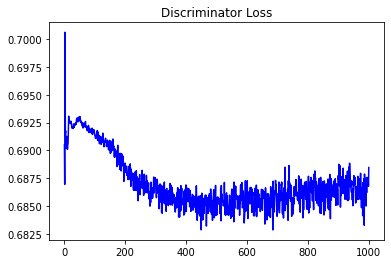

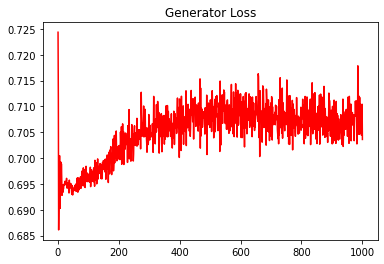

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1349882802055903


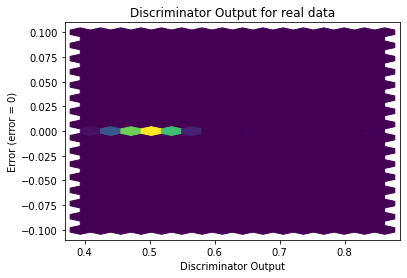

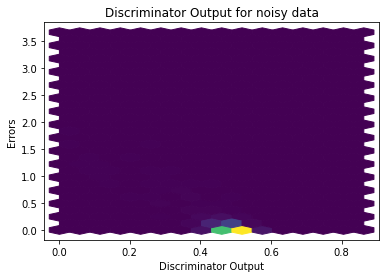

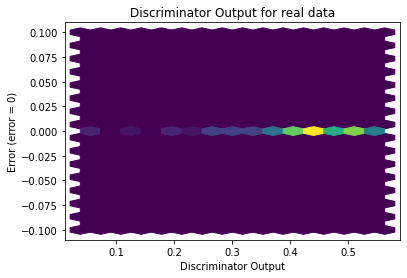

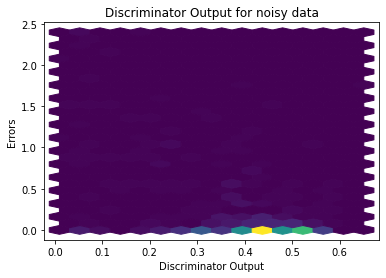

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7677]], requires_grad=True)
